In [1]:
datapath='../../features'
Flods=[0,1,2,3]
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import keras
from keras import optimizers
import matplotlib.pyplot as plt
from IPython import display
import time
import os
print(os.getcwd())

Using TensorFlow backend.


/home/mingchen/Course/CS235/CS235Project/scripts


In [80]:
class Network:

    def __init__(self, input_shape, num_classes, x_train, y_train,x_test,y_test):

        self.model = Sequential()

        self.input_shape = input_shape
        self.num_classes = num_classes

        self.x_train = x_train
        self.x_test=x_test
        self.y_train = []
        self.y_test=[]
        self.y_clean=[]
        for i in range(0, len(y_train)):
            self.y_train.append(y_train[i])
            self.y_clean.append(y_train[i])
        for i in range(0,len(y_test)):
            self.y_test.append(y_test[i])

        #self.y_train = keras.utils.to_categorical(self.y_train, self.num_classes)
        #self.y_test = keras.utils.to_categorical(self.y_test, self.num_classes)
        # self.y_clean = keras.utils.to_categorical(self.y_clean, self.num_classes)

        self.y_test=np.array(self.y_test)
        self.y_train=np.array(self.y_train)
        self.y_clean=np.array(self.y_clean)

        k=128
        self.model.add(Dense(k,activation='relu',input_shape=input_shape,
                             #kernel_initializer='he_normal',
                              kernel_initializer=keras.initializers.RandomNormal(0,0.001)))
        # self.model.add(Dense(k, activation='relu', input_shape=input_shape
        #                      , kernel_initializer=keras.initializers.RandomNormal(0, 1.0)))
        #self.model.add(Dropout(0.25))
        self.model.add(Dense(k/2,activation='relu',
                             kernel_initializer='he_normal'))
        #self.model.add(Dropout(0.25))
        self.model.add(Dense(num_classes,activation='relu',
                             #kernel_initializer='he_normal'))
                             kernel_initializer=keras.initializers.RandomNormal(0,0.001/float(k))))
        #self.model.add(Dense(num_classes, activation='softmax'))

#         self.model.compile(loss='categorical_crossentropy',
#                            optimizer=optimizers.Adadelta(), metrics=["accuracy"])
        self.model.compile(loss='mean_squared_error',
                           optimizer=optimizers.Adadelta(), metrics=["accuracy"])
        #print self.model.summary()

    def set_weights(self, weight):
        self.model.set_weights(weight)

    def get_weights(self):
        return self.model.get_weights()

    def fit(self, batch_size, epochs,verbose=1,callbacks=[]):
        self.model.fit(
            self.x_train, self.y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose,
            callbacks=callbacks,
            validation_data=(self.x_test,self.y_test),
            shuffle=True
        )


In [77]:
from keras import callbacks
import numpy as np
class History(callbacks.Callback):
    def __init__(self):
        self.train_acc=[]
        self.train_loss=[]
        self.test_acc=[]
        self.test_loss=[]
    def on_epoch_end(self,epoch,logs={}):
        self.train_acc.append(logs.get('acc'))
        self.train_loss.append(logs.get('loss'))
        self.test_acc.append(logs.get('val_acc'))
        self.test_loss.append(logs.get('val_loss'))
    def on_train_end(self,logs={}):
        np.save('../result/train_acc',self.train_acc)
        np.save('../result/train_loss',self.train_loss)
        np.save('../result/test_acc',self.test_acc)
        np.save('../result/test_loss',self.test_loss)
        plt.cla()
        plt.plot(self.train_acc,'r',linewidth=2)
        plt.plot(self.test_acc,'b',linewidth=2)
        plt.legend(['train','test'])

In [45]:
batch_size=128
epoch=200
num_classes=1
for flod in Flods:
    trainfile=open('{0}/cv_{1}_4_{2}_4/cv_train_features_{1}_4_{2}_4.csv'.format(datapath,flod,flod+1))
    testfile=open('{0}/cv_{1}_4_{2}_4/cv_test_features_{1}_4_{2}_4.csv'.format(datapath,flod,flod+1))
    trainX=[]
    trainY=[]
    testX=[]
    testY=[]
    for line in trainfile:
        line=line.split(',')[1:]
        if line[0]=='safe_type':
            continue
        line=[float(k) for k in line]
        trainX.append(line[1:])
        trainY.append(line[0])
    trainX=np.array(trainX)[:,:]
    meanX=np.mean(trainX)
    trainX-=meanX
    trainY=np.array(trainY).astype(int)
    #trainY[trainY==0]=-1
    print(trainX.shape,trainY.shape)
    
    for line in testfile:
        line=line.split(',')[1:]
        if line[0]=='safe_type':
            continue
        line=[float(k) for k in line]
        testX.append(line[1:])
        testY.append(line[0])
    testX=np.array(testX)[:,:]
    testX-=meanX
    testY=np.array(testY).astype(int)
    #testY[testY==0]=-1
    print(testX.shape,testY.shape)
    input_shape=(trainX.shape[1],)
    net = Network(input_shape, num_classes, trainX, trainY, testX, testY)
    #print(net.model.summary())
    net.fit(batch_size,epoch,verbose=1)
    print(net.model.evaluate(testX,texsY))
#     err=np.sum(testY[:,0]*ans<=0)/testY.shape[0]
#     print(err)

((18000, 55), (18000,))
((6000, 55), (6000,))
Train on 18000 samples, validate on 6000 samples
Epoch 1/200
18000/18000 [==============================] - 2s 110us/step - loss: 0.1619 - acc: 0.7956 - val_loss: 0.1176 - val_acc: 0.8483
Epoch 2/200
18000/18000 [==============================] - 1s 28us/step - loss: 0.1351 - acc: 0.8204 - val_loss: 0.1274 - val_acc: 0.8357
Epoch 3/200
18000/18000 [==============================] - 1s 29us/step - loss: 0.1243 - acc: 0.8404 - val_loss: 0.1225 - val_acc: 0.8560
Epoch 4/200
18000/18000 [==============================] - 1s 28us/step - loss: 0.1179 - acc: 0.8542 - val_loss: 0.1054 - val_acc: 0.8690
Epoch 5/200
18000/18000 [==============================] - 1s 28us/step - loss: 0.1125 - acc: 0.8633 - val_loss: 0.1109 - val_acc: 0.8745
Epoch 6/200
18000/18000 [==============================] - 1s 29us/step - loss: 0.1101 - acc: 0.8673 - val_loss: 0.1044 - val_acc: 0.8732
Epoch 7/200
18000/18000 [==============================] - 1s 29us/step - lo

KeyboardInterrupt: 

((24000, 5), (24000, 1))
((6000, 5), (6000, 1))
Train on 24000 samples, validate on 6000 samples
Epoch 1/300
24000/24000 [==============================] - 3s 127us/step - loss: 0.1447 - acc: 0.8177 - val_loss: 0.1244 - val_acc: 0.8467
Epoch 2/300
24000/24000 [==============================] - 1s 27us/step - loss: 0.1280 - acc: 0.8379 - val_loss: 0.1235 - val_acc: 0.8460
Epoch 3/300
24000/24000 [==============================] - 1s 27us/step - loss: 0.1200 - acc: 0.8491 - val_loss: 0.1154 - val_acc: 0.8597
Epoch 4/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.1142 - acc: 0.8543 - val_loss: 0.1233 - val_acc: 0.8425
Epoch 5/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.1082 - acc: 0.8592 - val_loss: 0.1094 - val_acc: 0.8752
Epoch 6/300
24000/24000 [==============================] - 1s 27us/step - loss: 0.1028 - acc: 0.8693 - val_loss: 0.0993 - val_acc: 0.8743
Epoch 7/300
24000/24000 [==============================] - 1s 27us/step - 

24000/24000 [==============================] - 1s 27us/step - loss: 0.0600 - acc: 0.9228 - val_loss: 0.0606 - val_acc: 0.9252
Epoch 60/300
24000/24000 [==============================] - 1s 27us/step - loss: 0.0601 - acc: 0.9222 - val_loss: 0.0619 - val_acc: 0.9195
Epoch 61/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0598 - acc: 0.9205 - val_loss: 0.0671 - val_acc: 0.9165
Epoch 62/300
24000/24000 [==============================] - 1s 27us/step - loss: 0.0605 - acc: 0.9219 - val_loss: 0.0591 - val_acc: 0.9243
Epoch 63/300
24000/24000 [==============================] - 1s 25us/step - loss: 0.0597 - acc: 0.9212 - val_loss: 0.0646 - val_acc: 0.9160
Epoch 64/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0585 - acc: 0.9243 - val_loss: 0.0645 - val_acc: 0.9170
Epoch 65/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0593 - acc: 0.9228 - val_loss: 0.0643 - val_acc: 0.9152
Epoch 66/300
24000/24000 [==============

Epoch 118/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0532 - acc: 0.9303 - val_loss: 0.0520 - val_acc: 0.9333
Epoch 119/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0539 - acc: 0.9293 - val_loss: 0.0519 - val_acc: 0.9277
Epoch 120/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0527 - acc: 0.9306 - val_loss: 0.0669 - val_acc: 0.9208
Epoch 121/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0535 - acc: 0.9300 - val_loss: 0.0600 - val_acc: 0.9212
Epoch 122/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0529 - acc: 0.9298 - val_loss: 0.0516 - val_acc: 0.9297
Epoch 123/300
24000/24000 [==============================] - 1s 27us/step - loss: 0.0527 - acc: 0.9306 - val_loss: 0.0586 - val_acc: 0.9238
Epoch 124/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0523 - acc: 0.9310 - val_loss: 0.0622 - val_acc: 0.9178
Epoch 125/300
24000/

24000/24000 [==============================] - 1s 26us/step - loss: 0.0504 - acc: 0.9341 - val_loss: 0.0596 - val_acc: 0.9238
Epoch 177/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0507 - acc: 0.9319 - val_loss: 0.0493 - val_acc: 0.9348
Epoch 178/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0505 - acc: 0.9343 - val_loss: 0.0513 - val_acc: 0.9315
Epoch 179/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0504 - acc: 0.9340 - val_loss: 0.0508 - val_acc: 0.9333
Epoch 180/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0507 - acc: 0.9332 - val_loss: 0.0530 - val_acc: 0.9307
Epoch 181/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0504 - acc: 0.9330 - val_loss: 0.0528 - val_acc: 0.9322
Epoch 182/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0497 - acc: 0.9347 - val_loss: 0.0517 - val_acc: 0.9335
Epoch 183/300
24000/24000 [=======

24000/24000 [==============================] - 1s 26us/step - loss: 0.0485 - acc: 0.9369 - val_loss: 0.0504 - val_acc: 0.9357
Epoch 235/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0480 - acc: 0.9361 - val_loss: 0.0583 - val_acc: 0.9222
Epoch 236/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0485 - acc: 0.9361 - val_loss: 0.0588 - val_acc: 0.9298
Epoch 237/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0485 - acc: 0.9351 - val_loss: 0.0541 - val_acc: 0.9297
Epoch 238/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0485 - acc: 0.9365 - val_loss: 0.0534 - val_acc: 0.9308
Epoch 239/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0486 - acc: 0.9362 - val_loss: 0.0508 - val_acc: 0.9337
Epoch 240/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0480 - acc: 0.9378 - val_loss: 0.0574 - val_acc: 0.9265
Epoch 241/300
24000/24000 [=======

24000/24000 [==============================] - 1s 26us/step - loss: 0.0479 - acc: 0.9376 - val_loss: 0.0448 - val_acc: 0.9455
Epoch 293/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0471 - acc: 0.9386 - val_loss: 0.0498 - val_acc: 0.9357
Epoch 294/300
24000/24000 [==============================] - 1s 25us/step - loss: 0.0473 - acc: 0.9402 - val_loss: 0.0458 - val_acc: 0.9410
Epoch 295/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0470 - acc: 0.9383 - val_loss: 0.0563 - val_acc: 0.9285
Epoch 296/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0475 - acc: 0.9397 - val_loss: 0.0480 - val_acc: 0.9400
Epoch 297/300
24000/24000 [==============================] - 1s 26us/step - loss: 0.0471 - acc: 0.9387 - val_loss: 0.0473 - val_acc: 0.9397
Epoch 298/300
24000/24000 [==============================] - 1s 27us/step - loss: 0.0473 - acc: 0.9390 - val_loss: 0.0508 - val_acc: 0.9350
Epoch 299/300
24000/24000 [=======

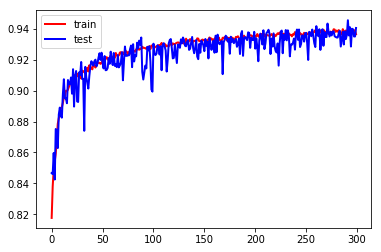

In [81]:
batch_size=128
epoch=300
trainfile=open('{0}/full/train_features_full.csv'.format(datapath,flod,flod+1))
testfile=open('{0}/full/test_features_full.csv'.format(datapath,flod,flod+1))
trainX=[]
trainY=[]
testX=[]
testY=[]
for line in trainfile:
    line=line.split(',')[1:]
    if line[0]=='safe_type':
        continue
    line=[float(k) for k in line]
    trainX.append(line[1:])
    trainY.append(line[0])
trainX=np.array(trainX)[:,:5]
trainY=np.array(trainY)[:,np.newaxis].astype(int)
print(trainX.shape,trainY.shape)

for line in testfile:
    line=line.split(',')[1:]
    if line[0]=='safe_type':
        continue
    line=[float(k) for k in line]
    testX.append(line[1:])
    testY.append(line[0])
testX=np.array(testX)[:,:5]
testY=np.array(testY)[:,np.newaxis].astype(int)
print(testX.shape,testY.shape)

input_shape=(trainX.shape[1],)
net = Network(input_shape, num_classes, trainX, trainY, testX, testY)


net.fit(batch_size,epoch,verbose=1,callbacks=[History()])
print(net.model.evaluate(testX,testY))



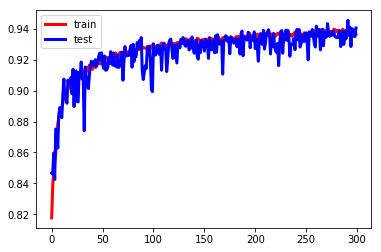

In [82]:

train_acc=np.load('../result/train_acc.npy')
train_loss=np.load('../result/train_loss.npy')
test_acc=np.load('../result/test_acc.npy')
test_loss=np.load('../result/test_loss.npy')
plt.cla()
plt.plot(train_acc,'r',linewidth=3)
plt.plot(test_acc,'b',linewidth=3)
plt.legend(['train','test'])

In [87]:
ans=net.model.predict(testX)
print(ans.shape)
ans=ans[:,0]
ans[ans>=0.5]=1
ans[ans<0.5]=0
outfile=open('{0}/full/result_NN.csv'.format(datapath),'w')
for i in range(0,testY.shape[0]):
    outfile.write('{0},{1}\n'.format(int(testY[i][0]),ans[i]))
outfile.close()

(6000, 1)


In [95]:
infile=open('{0}/full/result_NN.csv'.format(datapath))
count=0
score=0
for line in infile:
    count+=1
    line=line.replace('\n','').split(',')
    line=np.array([float(k) for k in line]).astype(int)
    if line[0]==line[1]:
        score+=1
    score-=(line[1]-line[0])*line[1]
print(float(score)/count)
infile.close()

0.922
